# **Covid-19 Analysis**


*   period of data: January 2020 - 22 March 2022

*   source of data: https://data.go.th/dataset/covid-19-daily

Attribute for confirmed-cases(xlsx) datasets:
1.   No - รหัสผู้ป่วย
2.   Age - อายุของผู้ป่วย
3.   Unit - หน่วยของอายุของผู้ป่วย
4.   Sex - เพศผู้ป่วย
5.   Nationality - สัญชาติ
6.   Province of isolation - จังหวัดที่รักษาตัว
7.   Notification Date - วันที่กระทรวงได้รับรายงาน
8.   Announce Date - วันที่แถลงข่าว
9.   Province of onset - จังหวัดที่เริ่มพบว่าตัวเองมีอาการป่วย
10.  District of onset - อำเภอที่เริ่มพบว่าตัวเองมีอาการป่วย
11.  Risk

Attribute for master_province(xlsx) datasets:
1.   PROVINCE_TH - ชื่อจังหวัดภาษาไทย
2.   PROVINCE_EN - ชื่อจังหวัดภาษาอังฤษ(พิมพ์เล็ก)
3.   REF_PROV - ชื่อจังหวัดภาษาอังฤษ(พิมพ์ใหญ่)
4.   COUNTRY - ประเทศ
5.   prov_idn - รหัสจังหวัด
6.   REGION_THAILAND - ภาคภาษาอังกฤษ







# 1. Import Data & Python Packages




###### **<font color="MidnightBlue"> 1.1) Import the necessary libraries.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

###### **<font color="MidnightBlue">1.2) Connect google colab with google drive and import data.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

data_since_012020 = pd.read_excel('/content/drive/MyDrive/data/confirmed-cases.xlsx')
data_since_082021 = pd.read_excel('/content/drive/MyDrive/data/confirmed-cases-since-120864.xlsx')
data_since_102021 = pd.read_excel('/content/drive/MyDrive/data/confirmed-cases-since-271064.xlsx')
data_since_022022 = pd.read_excel('/content/drive/MyDrive/data/confirmed-cases-since-280265.xlsx')
master_prv = pd.read_excel('/content/drive/MyDrive/data/master_province.xlsx')

Mounted at /content/drive/


###### **<font color="MidnightBlue">1.3) Preview sample data**

In [ ]:
data_since_012020.head(2)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN


In [ ]:
data_since_082021.head(2)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,816990,2021-08-12,2021-08-11,ชาย,7.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
1,816991,2021-08-12,2021-08-11,ชาย,1.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN


In [ ]:
data_since_102021.head(2)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1859158,2021-10-26,2021-10-25,ชาย,20,ปี,Thailand,ลำปาง,อื่นๆ,ลำปาง,เมืองลำปาง
1,1859159,2021-10-26,2021-10-25,หญิง,42,ปี,Thailand,ลำปาง,อื่นๆ,ลำปาง,เมืองลำปาง


In [ ]:
data_since_022022.head(2)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,2869617,2022-02-28,2022-02-27,ชาย,41.0,ปี,Thailand,พะเยา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,พะเยา,เมืองพะเยา
1,2869618,2022-02-28,2022-02-27,หญิง,45.0,ปี,Thailand,พะเยา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,พะเยา,เมืองพะเยา


In [ ]:
master_prv.head(2)

,province_use,PROVINCE_EN,REF_PROV,COUNTRY,prov_idn,REGION_THAILAND,region
0,เชียงใหม่,Chiang Mai,CHIANGMAI,Thailand,50,ภาคเหนือ,Northern
1,เชียงราย,Chiang Rai,CHIANGRAI,Thailand,57,ภาคเหนือ,Northern


###### **<font color="MidnightBlue">1.4) Recheck no. of Columns and Rows, Column name, Data types of Column for each file**

In [ ]:
master_prv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   province_use     78 non-null     object
 1   PROVINCE_EN      78 non-null     object
 2   REF_PROV         78 non-null     object
 3   COUNTRY          78 non-null     object
 4   prov_idn         78 non-null     object
 5   REGION_THAILAND  78 non-null     object
 6   region           78 non-null     object
dtypes: object(7)
memory usage: 4.4+ KB


In [ ]:
data_since_012020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816989 entries, 0 to 816988
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   No.                    816989 non-null  int64         
 1   announce_date          816989 non-null  datetime64[ns]
 2   Notified date          814194 non-null  datetime64[ns]
 3   sex                    763984 non-null  object        
 4   age                    742211 non-null  float64       
 5   Unit                   742352 non-null  object        
 6   nationality            734913 non-null  object        
 7   province_of_isolation  816717 non-null  object        
 8   risk                   815895 non-null  object        
 9   province_of_onset      719877 non-null  object        
 10  district_of_onset      661689 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 68.6+ MB


In [ ]:
data_since_082021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042168 entries, 0 to 1042167
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   No.                    1042168 non-null  int64         
 1   announce_date          1042168 non-null  datetime64[ns]
 2   Notified date          1042168 non-null  datetime64[ns]
 3   sex                    994463 non-null   object        
 4   age                    962171 non-null   float64       
 5   Unit                   962168 non-null   object        
 6   nationality            963132 non-null   object        
 7   province_of_isolation  1042168 non-null  object        
 8   risk                   1042168 non-null  object        
 9   province_of_onset      897594 non-null   object        
 10  district_of_onset      886221 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 87.5+ MB


In [ ]:
data_since_102021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010459 entries, 0 to 1010458
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   No.                    1010459 non-null  int64         
 1   announce_date          1010459 non-null  datetime64[ns]
 2   Notified date          1010459 non-null  datetime64[ns]
 3   sex                    951665 non-null   object        
 4   age                    923950 non-null   object        
 5   Unit                   903642 non-null   object        
 6   nationality            922053 non-null   object        
 7   province_of_isolation  1006775 non-null  object        
 8   risk                   1010380 non-null  object        
 9   province_of_onset      899173 non-null   object        
 10  district_of_onset      865730 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 84.8+ MB


In [ ]:
data_since_022022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507794 entries, 0 to 507793
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   No.                    507794 non-null  int64         
 1   announce_date          507794 non-null  datetime64[ns]
 2   Notified date          507794 non-null  datetime64[ns]
 3   sex                    481043 non-null  object        
 4   age                    477784 non-null  float64       
 5   Unit                   477779 non-null  object        
 6   nationality            458981 non-null  object        
 7   province_of_isolation  507794 non-null  object        
 8   risk                   507780 non-null  object        
 9   province_of_onset      452439 non-null  object        
 10  district_of_onset      459373 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 42.6+ MB


**<font color="IndianRed">Analyze:**<br>
<font color="IndianRed">เมื่อเช็คจำนวนคอลัมน์, ชื่อคอลัมน์ และรายละเอียดของข้อมูลในแต่ละไฟล์แล้วพบว่า มีจำนวน และชื่อคอลัมน์เหมือนกันในทุกไฟล์ จึงสามารถรวมเป็น 1 ไฟล์เพื่อรวบรวมข้อมูลผู้ป่วยโควิด-19ทุกเคสด้วยกัน และใช้ในการวิเคราะห์ข้อมูลต่อไป

# 2. Preparation of data and data quality



###### **<font color="MidnightBlue">2.1) Concatenate data into a single data set. Assign it to a variable called "all_data".**

In [ ]:
all_data = pd.concat([data_since_012020, data_since_082021,data_since_102021,data_since_022022], axis=0, ignore_index=True)

<font color="MidnightBlue">Preview sample data and recheck index of new dataframe.

In [ ]:
all_data.head(2)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN


In [ ]:
all_data.tail(2)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
3377408,3377409,2022-03-21,2022-03-20,ชาย,NaN,NaN,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
3377409,3377410,2022-03-21,2022-03-20,ชาย,NaN,NaN,NaN,นครศรีธรรมราช,ทัณฑสถาน/เรือนจำ,NaN,NaN


<font color="MidnightBlue"> Check no. of columns and rows & data types.

In [ ]:
all_data.shape

(3377410, 11)

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377410 entries, 0 to 3377409
Data columns (total 11 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   No.                    int64         
 1   announce_date          datetime64[ns]
 2   Notified date          datetime64[ns]
 3   sex                    object        
 4   age                    object        
 5   Unit                   object        
 6   nationality            object        
 7   province_of_isolation  object        
 8   risk                   object        
 9   province_of_onset      object        
 10  district_of_onset      object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 283.4+ MB


###### **<font color="MidnightBlue">2.2) Recheck number of missing value and describe data table.**

<font color="MidnightBlue">Check missing values.

In [ ]:
all_data.isnull().sum()

No.                           0
announce_date                 0
Notified date              2795
sex                      186255
age                      271294
Unit                     291469
nationality              298331
province_of_isolation      3956
risk                       1187
province_of_onset        408327
district_of_onset        504397
dtype: int64

<font color="MidnightBlue">Describe data.

In [ ]:
all_data.describe(include='all').T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
No.,3377410.0,NaN,NaN,NaN,NaT,NaT,1688705.5,974974.43067,1.0,844353.25,1688705.5,2533057.75,3377410.0
announce_date,3377410,744,2022-03-18 00:00:00,27071,2020-01-12,2022-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Notified date,3374615,719,2022-03-17 00:00:00,27071,2020-03-04,2022-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,3191155,11,หญิง,1692244,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,3106116.0,1233.0,25.0,76428.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit,3085941,5,ปี,3069994,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality,3079079,331,Thailand,2828479,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
province_of_isolation,3373454,80,กรุงเทพมหานคร,631811,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
risk,3376223,178,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,1419535,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
province_of_onset,2969083,440,กรุงเทพมหานคร,570337,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**<font color="IndianRed">Analyze:**<br>

<font color="IndianRed">-  คอลัมน์ No. (รหัสผู้ป่วย) ไม่มีค่า missing value ทำให้สามารถรู้ **จำนวนผู้ป่วยโควิด-19**  ทั้งหมดด้วยการนับจากรหัสของผู้ป่วยได้<br><br>

<font color="IndianRed">-  คอลัมน์ announce_date (วันที่แถลงข่าว) ไม่มีค่า missing value จึงเลือกใช้ **วันที่** ในคอลัมน์นี้เป็นพื้นฐานในการวิเคราะห์ต่อไป<br><br>

<font color="IndianRed">-  คอลัมน์ sex (เพศ) จากการดูรายละเอียด มีค่า unique value ทั้งหมด 11 ค่า ซึ่งค่าของเพศควรจะเป็นได้ 2 ค่าคือ ชาย หรือ หญิง โดยการสร้างคอลัมน์อายุใหม่ชื่อ "sex_use" เพื่อให้สามารถวิเคราะห์ข้อมูลต่อไป<br><br>

<font color="IndianRed">-  คอลัมน์ age (อายุของผู้ป่วย) เนื่องจากไม่สารถทราบอายุของผู้ป่วยทุกคนได้อย่างชัดเจน และมี data type เป็น object ดังนั้นจึงมีการเปลี่ยนแปลงข้อมูลในคอลัมน์ และ data type โดยการสร้างคอลัมน์อายุใหม่ชื่อ "age_use" เพื่อให้สามารถวิเคราะห์ข้อมูลต่อไป<br><br>

<font color="IndianRed">-  คอลัมน์ Unit (หน่วยของอายุ) จากการดูรายละเอียด มีค่า unique value ทั้งหมด 5 ค่า หากไปดูรายเอียดของข้อมูลภายในอาจมีการเปลี่ยนแปลงต่อไป<br><br>

<font color="IndianRed">-  คอลัมน์ nationality (สัญชาติ) จากการดูรายละเอียด มีค่า unique value ทั้งหมด 331 ค่า เนื่องจากมีความหลายทางเชื้อชาติ จึงจะแบ่งข้อมูลเป็น 2 กลุ่ม คือ<br>
1) Thai<br>
2) Foreign<br><br>
เนื่องจากพบว่าเป็นคนไทยแแล้ว 84%


<font color="IndianRed">- จังหวัดของผู้ป่วยโควิด-19 จากคอลัมน์ province_of_isolation (จังหวัดที่รักษาตัว) มีจำนวน missing value เพียง 3,596 record และรายละเอียดข้อมูลมีจำนวน unique value ทั้งหมด 80 ค่า เป็นข้อมูลที่ความครบถ้วนมากกว่า เมื่อเทียบกับ คอลัมน์ province_of_onset (จังหวัดที่เริ่มพบว่าตัวเองมีอาการป่วย) ดังนั้นจึงจะให้จังหวัดที่ผู้ป่วยรักษาตัวแทนจังหวัดของผู้ป่วยโควิดในการวิเคราะห์ครั้งนี้<br><br>



###### **<font color="MidnightBlue">2.3) sex column**

<font color="MidnightBlue">Count the number of values for each sex attribute.

In [ ]:
all_data.groupby('sex')['No.'].count().sort_values(ascending = False).to_frame()

,No.
sex,
หญิง,1692244
ชาย,1498888
นาย,9
หญิิง,5
ช,3
หญิง,1
ญ,1
ร.ต.ท.,1
หญง,1


In [ ]:
lst_gender = all_data['sex'].sort_values().unique()
print(lst_gender)
print(f'number of gender attribute: {len(lst_gender)}')

['\xa0หญิง' 'ช' 'ชาย' 'ญ' 'นาย' 'ร.ต.ท.' 'หญง' 'หญิง' 'หญิิง' 'หณิง' 'หห'
 nan]
number of gender attribute: 12


<font color="MidnightBlue">To transform data, create a new column "sex_use".

In [ ]:
all_data['sex_use'] = all_data['sex']
all_data.head(1)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,sex_use
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,หญิง


<font color="MidnightBlue">Create a function for gender grouping.

In [ ]:
def clean_gender(x):
  word_list_m = ['ช', 'ชาย', 'นาย', 'ร.ต.ท.']
  word_list_f = ['\xa0หญิง', 'ญ', 'หญง', 'หญิง', 'หญิิง', 'หณิง', 'หห']
  if x in word_list_m:
        res = 'male'  
  elif x in word_list_f:
        res = 'female'  
  else:
    res = x
  return res

<font color="MidnightBlue">Modify value in new column "sex_use".

In [ ]:
all_data['sex_use'] = all_data['sex_use'].apply(clean_gender)
all_data['sex_use'].value_counts().to_frame()

,sex_use
female,1692254
male,1498901


In [ ]:
print(f'Number of missing "sex" records is {all_data.sex_use.isnull().sum()} records\n\
Percent of missing "sex" records is {(all_data.sex_use.isnull().sum()/all_data.shape[0])*100:.2f}%')

Number of missing "sex" records is 186255 records
Percent of missing "sex" records is 5.51%


**<font color="IndianRed">Analyze:**<br>
<font color="IndianRed">เมื่อเปลี่ยนแปลงข้อมูล "เพศ" เรียบร้อยแล้ว พบว่ามี 186,255 record ที่ยังเป็น missing value แต่คิดเป็นเพียง 5.51% ของข้อมูลทั้งหมด ดังนั้นจึงจะเปลี่ยน record ที่ไม่ทราบเพศเป็น "unknown" เพื่อให้สามารภวิเคราะห์ข้อมูลได้ต่อไป

<font color="MidnightBlue">Missing value assessment of sex attribute.

In [ ]:
all_data['sex_use'] = all_data['sex_use'].fillna('unknown')
pd.concat([all_data['sex_use'].value_counts().to_frame(), all_data['sex_use'].value_counts(normalize=True).to_frame()], axis=1)

,sex_use,sex_use
female,1692254,0.501051
male,1498901,0.443802
unknown,186255,0.055147


In [ ]:
print(f'Number of missing "sex" records is {all_data.sex_use.isnull().sum()} records')

Number of missing "sex" records is 0 records


###### **<font color="MidnightBlue">2.4) Unit column**

<font color="MidnightBlue">Count the number of values for each Unit attribute & check missing value.

In [ ]:
all_data.groupby('Unit')['No.'].count().sort_values(ascending = False).to_frame()

,No.
Unit,
ปี,3069994
เดือน,14868
วัน,1056
เดือน,22
วัน,1


In [ ]:
lst_unit =  all_data['Unit'].sort_values().unique()
print(lst_unit)
print(f'number of unit attribute: {len(lst_unit)}')

[' วัน' ' เดือน' 'ปี' 'วัน' 'เดือน' nan]
number of unit attribute: 6


In [ ]:
print(f'Number of missing "Unit" records is {all_data.Unit.isnull().sum()} records\n\
Percent of missing "Unit" records is {(all_data.Unit.isnull().sum()/all_data.shape[0])*100:.2f}%')

Number of missing "Unit" records is 291469 records
Percent of missing "Unit" records is 8.63%


**<font color="IndianRed">Analyze:**<br>
<font color="IndianRed">-  เมื่อดูรายละเอียดของ คอลัมน์ Unit พบข้อมูลที่มี ช่องว่าง(ตัวอย่างเช่น "_ปี" ควรจะเป็น "ปี")  ดังนั้นจึงต้องมีการจัดการในส่วนนี้ โดยการสร้าง function ขึ้นมาเพื่อลบค่าช่องว่างในคอลัมน์นี้<br><br>
<font color="IndianRed">-  ข้อมูลผู้ป่วยโควิด-19 มี missing value จำนวน 291,469 record หรือคิดเป็น 8.63% ในส่วนของหน่วยของอายุผู้ป่วย ที่ไม่สามารถทราบหน่วยจริงได้ ดังนั้นจะทำการเปลี่ยนข้อมูลเป็น "unknown" เพื่อวิเคราะห์ข้อมูลต่อไป<br><br>


<font color="MidnightBlue">Missing value assessment of Unit attribute.

In [ ]:
all_data['Unit'] = all_data['Unit'].fillna('unknown')
all_data['Unit'].value_counts().to_frame()

,Unit
ปี,3069994
unknown,291469
เดือน,14868
วัน,1056
เดือน,22
วัน,1


<font color="MidnightBlue">Create function to clean space.

In [ ]:
def clean_space(x):
  x = str(x)
  x = x.replace(' ','')
  return x

In [ ]:
all_data['Unit'] = all_data['Unit'].apply(clean_space)
pd.concat([all_data['Unit'].value_counts().to_frame(), all_data['Unit'].value_counts(normalize=True).to_frame()], axis=1)

,Unit,Unit
ปี,3069994,0.908979
unknown,291469,0.086300
เดือน,14890,0.004409
วัน,1057,0.000313


###### **<font color="MidnightBlue">2.5) age column**

<font color="MidnightBlue">Count the number of values for each age.

In [ ]:
all_data.groupby('age')['No.'].count().sort_values(ascending = False).to_frame()

,No.
age,
25.0,76428
26.0,75294
24.0,74073
30.0,73885
27.0,73629
...,...
54.5246521864942,1
54.5652930990576,1
54.605934011621,1


In [ ]:
print(f'Number of missing "age" records is {all_data.age.isnull().sum()} records\n\
Percent of missing "age" records is {(all_data.age.isnull().sum()/all_data.shape[0])*100:.2f}%')

Number of missing "age" records is 271294 records
Percent of missing "age" records is 8.03%


**<font color="IndianRed">Analyze:**<br>
<font color="IndianRed">-  เมื่อวิเคราะห์ค่าในคอลัมน์ age พบว่ามีค่าที่แตกต่างกันมากถึง 1,233 ค่า และมี data type เป็น objects<br><br>

<font color="IndianRed">-  เนื่องจากข้อมูลมีความหลากหลายมาก เราจึงจะวิเคราะห์ข้อมูลของอายุเป็นกลุ่มรายกลุ่มของหน่วยของอายุแทน เพื่อให้สามารถเข้าถึงข้อมูล และจัดการหาส่วนที่ผิดได้ทุก records<br><br>

<font color="IndianRed">-  ข้อมูลผู้ป่วยโควิด-19 มี missing value จำนวน 271,294 record หรือคิดเป็น 8.03% ในส่วนของอายุ ดังนั้นจะทำการเปลี่ยนข้อมูลเป็น "-999" เพื่อวิเคราะห์ข้อมูลต่อไป และสะดวกในการเปลี่ยน data type เป็น int<br><br>

<font color="MidnightBlue">To transform data, create a new column "age_use".

In [ ]:
all_data['age_use'] = all_data['age']
all_data.head(1)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,sex_use,age_use
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,female,61.0


<font color="MidnightBlue">Missing value assessment of age attribute.

In [ ]:
all_data['age_use'] = all_data['age_use'].fillna(-999)
print(f"missing value of age: {all_data['age_use'].isnull().sum()} record")

missing value of age: 0 record


<font color="MidnightBlue">Propotion of age for each Unit.

In [ ]:
age_check = pd.DataFrame(all_data.groupby('Unit')['age_use'].count()).sort_values(by = 'age_use', ascending = False)
age_check['age_percent'] = all_data.groupby('Unit')['age_use'].count()/all_data.shape[0]
age_check

,age_use,age_percent
Unit,,
ปี,3069994,0.908979
unknown,291469,0.086300
เดือน,14890,0.004409
วัน,1057,0.000313


**<font color="IndianRed">Analyze:**<br>
<font color="IndianRed">-  90.90% ของข้อมูลมี หน่วยเป็น ปี<br>
<font color="IndianRed">-  8.63% ของข้อมูล ไม่มีข้อมูลอายุของผู้ป่วย<br>
<font color="IndianRed">-  0.44% ของข้อมูลมี หน่วยเป็น เดือน<br>
<font color="IndianRed">-  0.31% ของข้อมูลมี หน่วยเป็น วัน<br><br>

<font color="IndianRed">เนื่องจาก 8.63% ของข้อมูล เป็นอายุที่ไม่ทราบหน่วยของอายุ เราจึงปรับให้เป็นหน่วยปีทั้งหมด เนื่องจากสัดส่วนส่วนใหญ่ อยู่ในรูปของ "ปี" และได้มีการเปลี่ยนแปลงบางค่าที่ไม่สามารถระบุอายุจริงๆได้ เช่น 35/11, 44899, 2021 เป็น "-999" เพื่อการวิเคราะหข้อมูล<br>

<font color="MidnightBlue">Age in "unknown" Unit

In [ ]:
age_unit_unknown = all_data[all_data.Unit == "unknown"]
print(age_unit_unknown['age_use'].unique())
print('number of unique age in unknown Unit: ',len(age_unit_unknown['age_use'].unique()))

[-999 0.75 0.95 10.73 13.0 70.0 0.13 0.21 2.0 3.8 0.58 2021 121 149 50 48
 71 24 38 73 30 1 79 76 28 72 46 11 54 67 36 43 25 20 51 53 52 42 19 62 21
 69 26 32 31 57 23 33 18 34 27 22 39 35 58 60 9 59 45 16 83 5 37 65 78 44
 4 55 29 81 41 10 64 7 49 47 89 68 40 6 8 15 14 63 3 75 84 17 61 12 85 66
 74 56 87 82 80 86 90 77 88 94 93 96 92 100 118 0.92 330 0.3 0.4 91 1.5
 2.2 0.7 0.9 0.8 0.6 0.11 0.5 0.1 0.01 0.2 95 97 1.9 0.0008 '35/11' 44899
 241 122 125 146 37.2 116.0 123.0 0.33 25.7]
number of unique age in unknown Unit:  138


In [ ]:
unknowunit_age = {
    '2021':-999,
    '35/11':-999,
    44899:-999}

In [ ]:
all_data['age_use'] = all_data['age_use'].replace(unknowunit_age)
age_unit_unknown = all_data[(all_data.Unit == "unknown") & (all_data.age_use != -999)]
age_unit_unknown.head(2)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,sex_use,age_use
114169,114170,2021-05-19,2021-05-18,หญิง,0.75,unknown,Burmese,ระนอง,อยู่ระหว่างการสอบสวน,ระนอง,เมืองระนอง,female,0.75
114204,114205,2021-05-19,2021-05-18,หญิง,0.95,unknown,Thailand,นครศรีธรรมราช,อยู่ระหว่างการสอบสวน,นครศรีธรรมราช,เมือง,female,0.95


In [ ]:
all_data.loc[(all_data.Unit == "unknown"), ['Unit']] = 'ปี'

In [ ]:
age_unit_unknown = all_data[all_data.Unit == "unknown"]
age_unit_unknown.head(2)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,sex_use,age_use


<font color="MidnightBlue">Age in Unit = "เดือน"

In [ ]:
age_unit_month = all_data[all_data.Unit == "เดือน"]
print(age_unit_month['age_use'].unique())
print('number of unique age in เดือน Unit: ',len(age_unit_month['age_use'].unique()))

[5.0 4.0 3.0 1.0 7.0 6.0 11.0 9.0 2.0 8.0 10.0 12.0 20.0 18.0 16.0 19.0
 28.0 13.0 15.0 21.0 30.0 23.0 33.0]
number of unique age in เดือน Unit:  23


In [ ]:
age_unit_month.groupby('Unit')['age_use'].agg(['mean', 'min', 'max','median'])

,mean,min,max,median
Unit,,,,
เดือน,5.53687,1.0,33.0,6.0


<font color="MidnightBlue">Age in Unit = "วัน"

In [ ]:
age_unit_day = all_data[all_data.Unit == "วัน"]
print(age_unit_day['age_use'].unique())
print('number of unique age in วัน Unit: ',len(age_unit_day['age_use'].unique()))

[26.0 2.0 3.0 10.0 7.0 5.0 8.0 9.0 18.0 4.0 11.0 17.0 6.0 15.0 23.0 19.0
 1.0 24.0 13.0 14.0 29.0 28.0 22.0 21.0 27.0 16.0 12.0 25.0 33.0]
number of unique age in วัน Unit:  29


In [ ]:
age_unit_day.groupby('Unit')['age_use'].agg(['mean', 'min', 'max','median'])

,mean,min,max,median
Unit,,,,
วัน,6.284768,1.0,33.0,1.0


**<font color="IndianRed">Analyze:**<br>
<font color="IndianRed">เนื่องจากจำนวนอายุ ในหน่วย เดือน และวัน มีเพียง 0.44% และ 0.31% ตามลำดับ ซึ่งเป็นส่วนน้อย และค่า median ของเดือนมีค่าคือ 6 พอดี เลยมีการปรับค่าอายุ ในหน่วยเดือน และวันเป็น 1 ปี เพื่อนำไปวิเคราะห์ข้อมูลต่อไป<br>

<font color="MidnightBlue">Modify value in Unit: "เดือน" and "วัน"

In [ ]:
all_data.loc[(all_data.Unit == "เดือน"), 'age_use'] = 1
all_data.loc[(all_data.Unit == "วัน"), 'age_use'] = 1

all_data.loc[(all_data.Unit == "เดือน"), 'Unit'] = 'ปี'
all_data.loc[(all_data.Unit == "วัน"), 'Unit'] = 'ปี'

In [ ]:
age_check = pd.DataFrame(all_data.groupby('Unit')['age_use'].count()).sort_values(by = 'age_use', ascending = False)
age_check['age_percent'] = all_data.groupby('Unit')['age_use'].count()/all_data.shape[0]
age_check

,age_use,age_percent
Unit,,
ปี,3377410,1.0


<font color="MidnightBlue">Age in Unit = "ปี"

In [ ]:
age_unit_year = all_data[all_data.Unit == "ปี"]
lst_age_unit_year = age_unit_year['age_use'].astype(str).sort_values().unique()
print(lst_age_unit_year)
print('number of unique age in ปี Unit: ',len(lst_age_unit_year))

['-999' '0.0008' '0.01' ... '99' '99.0' '\xa080']
number of unique age in ปี Unit:  1340


In [ ]:
yearunit_age = {
    '\xa080':-999}

In [ ]:
all_data['age_use'] = all_data['age_use'].replace(yearunit_age)
all_data.head(2)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,sex_use,age_use
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,female,61.0
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,female,74.0


<font color="MidnightBlue">Convert object types to int types for the age column.

In [ ]:
all_data['age_use'] = all_data.age_use.astype(int)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377410 entries, 0 to 3377409
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   No.                    int64         
 1   announce_date          datetime64[ns]
 2   Notified date          datetime64[ns]
 3   sex                    object        
 4   age                    object        
 5   Unit                   object        
 6   nationality            object        
 7   province_of_isolation  object        
 8   risk                   object        
 9   province_of_onset      object        
 10  district_of_onset      object        
 11  sex_use                object        
 12  age_use                int64         
dtypes: datetime64[ns](2), int64(2), object(9)
memory usage: 335.0+ MB


In [ ]:
lst_age = all_data['age_use'].sort_values().unique()
print(lst_age)

[-999    0    1    2    3    4    5    6    7    8    9   10   11   12
   13   14   15   16   17   18   19   20   21   22   23   24   25   26
   27   28   29   30   31   32   33   34   35   36   37   38   39   40
   41   42   43   44   45   46   47   48   49   50   51   52   53   54
   55   56   57   58   59   60   61   62   63   64   65   66   67   68
   69   70   71   72   73   74   75   76   77   78   79   80   81   82
   83   84   85   86   87   88   89   90   91   92   93   94   95   96
   97   98   99  100  101  102  103  104  105  106  107  108  109  110
  112  114  116  117  118  119  121  122  123  125  143  146  149  158
  241  330  440 2021]


In [ ]:
yearunit_age_2 = {2021:-999}
all_data['age_use'] = all_data['age_use'].replace(yearunit_age_2)
lst_age = all_data['age_use'].sort_values().unique()
print(lst_age)

[-999    0    1    2    3    4    5    6    7    8    9   10   11   12
   13   14   15   16   17   18   19   20   21   22   23   24   25   26
   27   28   29   30   31   32   33   34   35   36   37   38   39   40
   41   42   43   44   45   46   47   48   49   50   51   52   53   54
   55   56   57   58   59   60   61   62   63   64   65   66   67   68
   69   70   71   72   73   74   75   76   77   78   79   80   81   82
   83   84   85   86   87   88   89   90   91   92   93   94   95   96
   97   98   99  100  101  102  103  104  105  106  107  108  109  110
  112  114  116  117  118  119  121  122  123  125  143  146  149  158
  241  330  440]


###### **<font color="MidnightBlue">2.6) nationality column**

<font color="MidnightBlue">Describe values in nationality attribute.

In [ ]:
all_data.groupby('nationality')['No.'].count().sort_values(ascending = False).to_frame()

,No.
nationality,
Thailand,2828479
Burmese,133948
Cambodian,38728
Thai,20632
Burma,18759
...,...
Guatemalan,1
Timorese,1
Timor-Leste,1


In [ ]:
lst_nationality = all_data['nationality'].sort_values().unique()
print(f'list of unique nationality:\n {lst_nationality}')
print(f'number of nationality:\n {len(lst_nationality)}')

list of unique nationality:
 ['AUSTRALIAN' 'Afghan' 'Afghan / Afghani' 'Afghanistan' 'African'
 'Albania' 'Albanian' 'Algeria' 'Algerian' 'American' 'American '
 'American Samoa' 'Americans' 'Arabi' 'Argentina' 'Argentine'
 'Argentine / Argentinian' 'Armenia' 'Armenian' 'Australia' 'Australian'
 'Austria' 'Austrian' 'Azerbaijan' 'BAHRAINI' 'BRITISH' 'Bahrain'
 'Bahraini' 'Bangladesh' 'Bangladeshi' 'Belarus' 'Belarusian' 'Belgian'
 'Belgium' 'Bermuda' 'Bhutan' 'Bosnian' 'Bosnian/Herzegovinian' 'Brazil'
 'Brazilian' 'British' 'British / English' 'British / Northern Irish'
 'British / Scottish' 'British / Welsh' 'British/English' 'Brunei'
 'Bruneian' 'Bulgaria' 'Bulgarian' 'Burma' 'Burmese' 'CAMBODIAN' 'CZECH'
 'Cambodia' 'Cambodian' 'Cameroon' 'Canada' 'Canadian' 'Chilean' 'China'
 'Chinese' 'Colombia' 'Colombian' 'Congo (Brazzaville)' "Cote D'Ivoire"
 'Croatia' 'Croatian' 'Cuba' 'Cuban' 'Cypriot' 'Czech' 'Czechia' 'Danish'
 'Denmark' 'Dominican Republic' 'Dutch' 'Ecuadorian' 'Egypt' 'Eg

<font color="MidnightBlue">To transform data, create a new column "nationality_use".

In [ ]:
all_data['nationality_use'] = all_data['nationality']

<font color="MidnightBlue">In this column, look for any missing values.

In [ ]:
print(f'Number of missing "nationality" records is {all_data.nationality.isnull().sum()} records\n\
Percent of missing "nationality" records is {(all_data.nationality.isnull().sum()/all_data.shape[0])*100:.2f}%')

Number of missing "nationality" records is 298331 records
Percent of missing "nationality" records is 8.83%


**<font color="IndianRed">Analyze:**<br>
<font color="IndianRed">-  ในส่วนของสัญชาติ  มี missing value จำนวน 298,331 record หรือคิดเป็น 8.83% ที่ไม่ทราบสัญชาติ<br>
ดังนั้นจะทำการเปลี่ยนข้อมูลเป็น "unknown" เพื่อวิเคราะห์ข้อมูลต่อไป<br><br>

In [ ]:
all_data['nationality_use'] = all_data['nationality_use'].fillna('unknown')
print(f'Number of missing "nationality" records is {all_data.nationality_use.isnull().sum()} records')

Number of missing "nationality" records is 0 records


**<font color="IndianRed">Analyze:**<br>

<font color="IndianRed">-  ข้อมูลในคอลัมน์ nationality มีความหลากหลายของสัญชาติมาก จึงจะวิเคราะห์ข้อมูล โดยกาารแบ่งข้อมูลเป็น 2 กลุ่มคือ<br>
1) Thai - ผู้ป่วยที่เป็นคนไทย<br>
2) Foreign - ผู้ป่วยที่เป็นชาวต่างชาติ<br><br>

<font color="MidnightBlue">Create a function for the nationality "Thai."

In [ ]:
def clean_thaination(x):
  word_list = ['Thai','Thailand']
  if x in word_list:
    res = 'Thai'
  elif x == 'unknown':
    res = 'unknown'
  else:
    res = 'Foreign'
  return res

In [ ]:
all_data['nationality_use'] = all_data['nationality_use'].apply(clean_thaination)
pd.concat([all_data['nationality_use'].value_counts().to_frame(), all_data['nationality_use'].value_counts(normalize=True).to_frame()], axis=1)

,nationality_use,nationality_use
Thai,2849111,0.843579
unknown,298331,0.088331
Foreign,229968,0.068090


In [ ]:
all_data.head(2)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,sex_use,age_use,nationality_use
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,female,61,Foreign
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN,female,74,Foreign


###### **<font color="MidnightBlue">2.7) province_of_isolation column**

<font color="MidnightBlue">Describe values in province_of_isolation attribute.

In [ ]:
all_data.groupby('province_of_isolation')['No.'].count().sort_values(ascending = False).to_frame()

,No.
province_of_isolation,
กรุงเทพมหานคร,631811
สมุทรปราการ,200201
ชลบุรี,181240
สมุทรสาคร,142647
นนทบุรี,112394
...,...
ลำพูน,5631
แม่ฮ่องสอน,4564
กทม,2557


In [ ]:
lst_province_of_isolation = all_data['province_of_isolation'].sort_values().unique()
print(f'list of unique province_of_isolation:\n {lst_province_of_isolation}')
print(f'number of province_of_isolation:\n {len(lst_province_of_isolation)}')

list of unique province_of_isolation:
 ['กทม' 'กระบี่' 'กรุงเทพมหานคร' 'กาญจนบุรี' 'กาฬสินธุ์' 'กำแพงเพชร'
 'ขอนแก่น' 'ขอนแก่น\xa0' 'จันทบุรี' 'ฉะเชิงเทรา' 'ชลบุรี' 'ชัยนาท'
 'ชัยภูมิ' 'ชุมพร' 'ตรัง' 'ตราด' 'ตาก' 'นครนายก' 'นครปฐม' 'นครพนม'
 'นครราชสีมา' 'นครศรีธรรมราช' 'นครสวรรค์' 'นนทบุรี' 'นราธิวาส' 'น่าน'
 'บึงกาฬ' 'บุรีรัมย์' 'ปทุมธานี' 'ประจวบคีรีขันธ์' 'ปราจีนบุรี' 'ปัตตานี'
 'พระนครศรีอยุธยา' 'พะเยา' 'พังงา' 'พัทลุง' 'พิจิตร' 'พิษณุโลก' 'ภููเก็ต'
 'ภูเก็ต' 'มหาสารคาม' 'มุกดาหาร' 'ยะลา' 'ยโสธร' 'ระนอง' 'ระยอง' 'ราชบุรี'
 'ร้อยเอ็ด' 'ลพบุรี' 'ลำปาง' 'ลำพูน' 'ศรีสะเกษ' 'สกลนคร' 'สงขลา' 'สตูล'
 'สมุทรปราการ' 'สมุทรสงคราม' 'สมุทรสาคร' 'สระบุรี' 'สระแก้ว' 'สิงห์บุรี'
 'สุพรรณบุรี' 'สุราษฎร์ธานี' 'สุรินทร์' 'สุโขทัย' 'หนองคาย' 'หนองบัวลำภู'
 'อำนาจเจริญ' 'อุดรธานี' 'อุตรดิตถ์' 'อุทัยธานี' 'อุบลราชธานี' 'อ่างทอง'
 'เชียงราย' 'เชียงใหม่' 'เพชรบุรี' 'เพชรบูรณ์' 'เลย' 'แพร่' 'แม่ฮ่องสอน'
 nan]
number of province_of_isolation:
 81


<font color="MidnightBlue">In this column, look for any missing values.

In [ ]:
print(f'Number of missing "province_of_isolation" records is {all_data.province_of_isolation.isnull().sum()} records\n\
Percent of missing "province_of_isolation" records is {(all_data.province_of_isolation.isnull().sum()/all_data.shape[0])*100:.2f}%')

Number of missing "province_of_isolation" records is 3956 records
Percent of missing "province_of_isolation" records is 0.12%


**<font color="IndianRed">Analyze:**<br>

<font color="IndianRed">-  เพื่อความสมบูรณ์ที่เพิ่มขึ้นของข้อมูล จึงเลือกจัดการกับ missing value ในคอลัมน์ "province_of_isolation" ด้วยการเติมข้อมูลจังหวัดจากคอมลัมน์ "province_of_onset" เพื่อลดจำนวน missing value.

<font color="MidnightBlue">To transform data, create a new column "province_of_isolation_use".

In [ ]:
all_data['province_use'] = all_data['province_of_isolation']

<font color="MidnightBlue">Fill missing value in "province_of_isolation" with "province_of_onset" .

In [ ]:
all_data['province_use'] = all_data['province_use'].fillna(all_data['province_of_onset'])

In [ ]:
print(f'Number of missing "province_of_isolation" records is {all_data.province_use.isnull().sum()} records\n\
Percent of missing "province_of_isolation" records is {(all_data.province_use.isnull().sum()/all_data.shape[0])*100:.2f}%')

Number of missing "province_of_isolation" records is 216 records
Percent of missing "province_of_isolation" records is 0.01%


**<font color="IndianRed">Analyze:**<br>

<font color="IndianRed">-  เมื่อเติมข้อมูลด้วย "province_of_onset" พบว่าค่า missing value ในคอลัมน์ "province_use" ลดลงเหลือเพียง 216 records หรือคิดเป็น 0.01% เท่านั้น<br><br>

<font color="IndianRed">-  จากนั้นจึงรายชื่อจังหวัดทั้งหมดในคอลัมน์ "province_use" ออกมาศึกษาอีกครั้ง<br><br>

In [ ]:
lst_province_use = all_data['province_use'].sort_values().unique()
print(f'list of unique province_use:\n {lst_province_use}')
print(f'number of province_use:\n {len(lst_province_use)}')

list of unique province_use:
 ['กทม' 'กระบี่' 'กรุงเทพมหานคร' 'กาญจนบุรี' 'กาฬสินธุ์' 'กำแพงเพชร'
 'ขอนแก่น' 'ขอนแก่น\xa0' 'จันทบุรี' 'ฉะเชิงเทรา' 'ชลบุรี' 'ชัยนาท'
 'ชัยภูมิ' 'ชุมพร' 'ตรัง' 'ตราด' 'ตาก' 'นครนายก' 'นครปฐม' 'นครพนม'
 'นครราชสีมา' 'นครศรีธรรมราช' 'นครสวรรค์' 'นนทบุรี' 'นราธิวาส' 'น่าน'
 'บึงกาฬ' 'บุรีรัมย์' 'ปทุมธานี' 'ประจวบคีรีขันธ์' 'ปราจีนบุรี' 'ปัตตานี'
 'พระนครศรีอยุธยา' 'พะเยา' 'พังงา' 'พัทลุง' 'พิจิตร' 'พิษณุโลก' 'ภููเก็ต'
 'ภูเก็ต' 'มหาสารคาม' 'มุกดาหาร' 'ยะลา' 'ยโสธร' 'ระนอง' 'ระยอง' 'ราชบุรี'
 'ร้อยเอ็ด' 'ลพบุรี' 'ลำปาง' 'ลำพูน' 'ศรีสะเกษ' 'สกลนคร' 'สงขลา' 'สตูล'
 'สมุทรปราการ' 'สมุทรสงคราม' 'สมุทรสาคร' 'สระบุรี' 'สระแก้ว' 'สิงห์บุรี'
 'สุพรรณบุรี' 'สุพรรณบุรี\xa0' 'สุราษฎร์ธานี' 'สุรินทร์' 'สุโขทัย'
 'หนองคาย' 'หนองบัวลำภู' 'อำนาจเจริญ' 'อุดรธานี' 'อุตรดิตถ์' 'อุทัยธานี'
 'อุบลราชธานี' 'อ่างทอง' 'เชียงราย' 'เชียงใหม่' 'เพชรบุรี' 'เพชรบูรณ์'
 'เมือง' 'เลย' 'แพร่' 'แม่ฮ่องสอน' nan]
number of province_use:
 83


<font color="MidnightBlue">Missing value assessment of province attribute.

In [ ]:
all_data['province_use'] = all_data['province_use'].fillna('unknown')
print(f'Number of missing "province" records is {all_data.province_use.isnull().sum()} records')

Number of missing "province" records is 0 records


<font color="MidnightBlue">Create function for province grouping.

In [ ]:
def clean_province(x):
  bangkok = ['กทม', 'กรุงเทพมหานคร']
  khonkaen = ['ขอนแก่น\xa0', 'ขอนแก่น']
  phuket = ['ภููเก็ต','ภูเก็ต']
  suphanburi = ['สุพรรณบุรี', 'สุพรรณบุรี\xa0']
  unknown = ['เมือง']
  if x in bangkok:
        res = 'กรุงเทพมหานคร'  
  elif x in khonkaen:
        res = 'ขอนแก่น' 
  elif x in phuket:
        res = 'ภูเก็ต'
  elif x in suphanburi:
        res = 'สุพรรณบุรี'
  elif x in unknown:
        res = 'unknown'
  else:
    res = x
  return res

<font color="MidnightBlue">Modify value in "province_use" column.

In [ ]:
all_data['province_use'] = all_data['province_use'].apply(clean_province)
lst_province_use = all_data['province_use'].sort_values().unique()
print(f'list of unique province_use:\n {lst_province_use}')
print(f'number of province_use:\n {len(lst_province_use)}')

list of unique province_use:
 ['unknown' 'กระบี่' 'กรุงเทพมหานคร' 'กาญจนบุรี' 'กาฬสินธุ์' 'กำแพงเพชร'
 'ขอนแก่น' 'จันทบุรี' 'ฉะเชิงเทรา' 'ชลบุรี' 'ชัยนาท' 'ชัยภูมิ' 'ชุมพร'
 'ตรัง' 'ตราด' 'ตาก' 'นครนายก' 'นครปฐม' 'นครพนม' 'นครราชสีมา'
 'นครศรีธรรมราช' 'นครสวรรค์' 'นนทบุรี' 'นราธิวาส' 'น่าน' 'บึงกาฬ'
 'บุรีรัมย์' 'ปทุมธานี' 'ประจวบคีรีขันธ์' 'ปราจีนบุรี' 'ปัตตานี'
 'พระนครศรีอยุธยา' 'พะเยา' 'พังงา' 'พัทลุง' 'พิจิตร' 'พิษณุโลก' 'ภูเก็ต'
 'มหาสารคาม' 'มุกดาหาร' 'ยะลา' 'ยโสธร' 'ระนอง' 'ระยอง' 'ราชบุรี'
 'ร้อยเอ็ด' 'ลพบุรี' 'ลำปาง' 'ลำพูน' 'ศรีสะเกษ' 'สกลนคร' 'สงขลา' 'สตูล'
 'สมุทรปราการ' 'สมุทรสงคราม' 'สมุทรสาคร' 'สระบุรี' 'สระแก้ว' 'สิงห์บุรี'
 'สุพรรณบุรี' 'สุราษฎร์ธานี' 'สุรินทร์' 'สุโขทัย' 'หนองคาย' 'หนองบัวลำภู'
 'อำนาจเจริญ' 'อุดรธานี' 'อุตรดิตถ์' 'อุทัยธานี' 'อุบลราชธานี' 'อ่างทอง'
 'เชียงราย' 'เชียงใหม่' 'เพชรบุรี' 'เพชรบูรณ์' 'เลย' 'แพร่' 'แม่ฮ่องสอน']
number of province_use:
 78


In [ ]:
prv_check = pd.DataFrame(all_data.groupby('province_use')['No.'].count()).sort_values(by = 'No.', ascending = False)
prv_check['age_percent'] = (all_data.groupby('province_use')['No.'].count()*100)/all_data.shape[0]
prv_check

,No.,age_percent
province_use,,
กรุงเทพมหานคร,634872,18.797599
สมุทรปราการ,200338,5.931705
ชลบุรี,181379,5.370358
สมุทรสาคร,142781,4.227529
นนทบุรี,112518,3.331488
...,...,...
อำนาจเจริญ,5938,0.175815
ชัยนาท,5646,0.167170
ลำพูน,5639,0.166962


<font color="MidnightBlue">Mapping region for each province with master_prv dataframe on "province_use" column.

In [ ]:
master_prv.head(2)

,province_use,PROVINCE_EN,REF_PROV,COUNTRY,prov_idn,REGION_THAILAND,region
0,เชียงใหม่,Chiang Mai,CHIANGMAI,Thailand,50,ภาคเหนือ,Northern
1,เชียงราย,Chiang Rai,CHIANGRAI,Thailand,57,ภาคเหนือ,Northern


In [ ]:
all_data = pd.merge(all_data, master_prv, how='left', on = 'province_use')

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3377410 entries, 0 to 3377409
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   No.                    int64         
 1   announce_date          datetime64[ns]
 2   Notified date          datetime64[ns]
 3   sex                    object        
 4   age                    object        
 5   Unit                   object        
 6   nationality            object        
 7   province_of_isolation  object        
 8   risk                   object        
 9   province_of_onset      object        
 10  district_of_onset      object        
 11  sex_use                object        
 12  age_use                int64         
 13  nationality_use        object        
 14  province_use           object        
 15  PROVINCE_EN            object        
 16  REF_PROV               object        
 17  COUNTRY                object        
 18  prov_idn              

###### **<font color="MidnightBlue">2.8) announce_date column**

In [ ]:
year = lambda x: x.strftime("%Y")
month = lambda x: x.strftime("%B")
month_num = lambda x: x.strftime("%m")
yearmonth = lambda x: x.strftime("%b-%Y")
yearmonth_num = lambda x: x.strftime("%Y%m")

In [ ]:
all_data['year'] = all_data.announce_date.apply(year)
all_data['month'] = all_data.announce_date.apply(month)
all_data['month_num'] = all_data.announce_date.apply(month_num)
all_data['yearmonth'] = all_data.announce_date.apply(yearmonth)
all_data['yearmonth_num'] = all_data.announce_date.apply(yearmonth_num)

###### **<font color="MidnightBlue">2.9) final review of data information**

In [ ]:
all_data.head(2)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,...,REF_PROV,COUNTRY,prov_idn,REGION_THAILAND,region,year,month,month_num,yearmonth,yearmonth_num
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,...,BANGKOK,Thailand,10,ภาคกลาง,Central,2020,January,01,Jan-2020,202001
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,...,BANGKOK,Thailand,10,ภาคกลาง,Central,2020,January,01,Jan-2020,202001


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3377410 entries, 0 to 3377409
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   No.                    int64         
 1   announce_date          datetime64[ns]
 2   Notified date          datetime64[ns]
 3   sex                    object        
 4   age                    object        
 5   Unit                   object        
 6   nationality            object        
 7   province_of_isolation  object        
 8   risk                   object        
 9   province_of_onset      object        
 10  district_of_onset      object        
 11  sex_use                object        
 12  age_use                int64         
 13  nationality_use        object        
 14  province_use           object        
 15  PROVINCE_EN            object        
 16  REF_PROV               object        
 17  COUNTRY                object        
 18  prov_idn              

# 3. Exploratory Data Analysis (EDA)

### **<font color="MidnightBlue">3.1) Datetime-based exploration.**

###### **<font color="MidnightBlue">a) Trend daily new case of covid-19 from December 20 to 22 March 21 in Thailand.**

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(20,5), 'figure.dpi':80})

From January 1, 2020, to March 22, 2022, Thailand's total Covid-19 case is 3,377,410.
The average number of cases per day is 4,540.


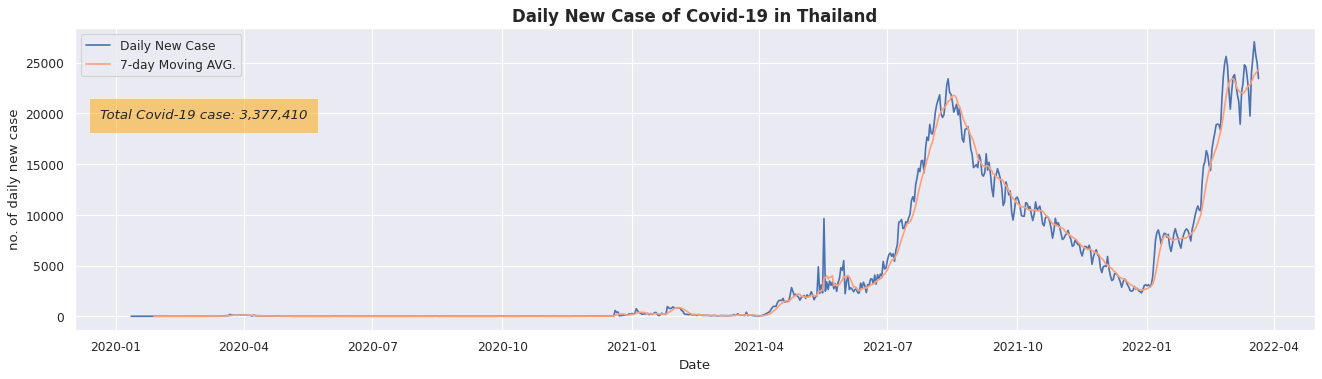

In [ ]:
#Daily new case
movement = pd.DataFrame(all_data.groupby(['announce_date'], as_index=False)['No.'].count())
#7-day rolling average
movement['cases_7day_ave'] = movement['No.'].rolling(7).mean()

plt.title('Daily New Case of Covid-19 in Thailand', fontweight='bold' , fontsize=15)
plt.ylabel('no. of daily new case')
plt.xlabel('Date')
sns.lineplot(x="announce_date", y="No.", label="Daily New Case",palette="vlag", data=movement)
sns.lineplot(x="announce_date", y="cases_7day_ave",label="7-day Moving AVG.", data=movement, color='lightsalmon')

total = all_data['No.'].count()
cnt_date = all_data['announce_date'].nunique()
plt.text(0.02, 0.7, f"Total Covid-19 case: {total:,}" , transform=plt.gca().transAxes, style='italic', bbox={'facecolor': 'orange', 'alpha': 0.5, 'pad': 10})

print(f"From January 1, 2020, to March 22, 2022, Thailand's total Covid-19 case is {total:,}.")
print(f"The average number of cases per day is {total/cnt_date:,.0f}.")



**<font color="IndianRed">Key Highlights:**<br>
<font color="IndianRed">
1.   ผู้ป่วยโควิดสะสมตั้งแต่วันที่ 1 มกราคม 2563 ถึง 22 มีนาคม 2565 จำนวนทั้งหมด 3,377,410 ราย
2.   ค่าเฉลี่ยรายวันตามจำนวนข้อมูลทั้งหมด 744 วัน คิดเป็น 4,540 รายต่อวัน
3.   จากกราฟ "Daily New Case of Covid-19 in Thailand" พบว่ายอดผู้ป่วยโควิดเริ่มสูงขึ้นเรื่อยๆตั้งแต่มกราคม2563 จนถึงจุดสูงสุดในรอบนี้คือเดือนสิงหาคม2564 จากนั้นลดลงจนต่ำสุดที่เดือนมกราคม2565 และมีการสูงขึ้นมากที่สุดอีกครั้งอย่างรวดเร็วที่เดือนมีนาคม2565 หรือในช่วงเวลาปัจุบันนี้
4.   และพบ 3 ช่วงระยะเวลา ที่มีค่ายอดผู้ติดเชื้อสะสมสูงกว่าค่าเฉลี่ยเคลื่อนที่(7 days) คือช่วงเดือนมิถุนายน2564, สิงหาคม2564 และมีนาคม2565




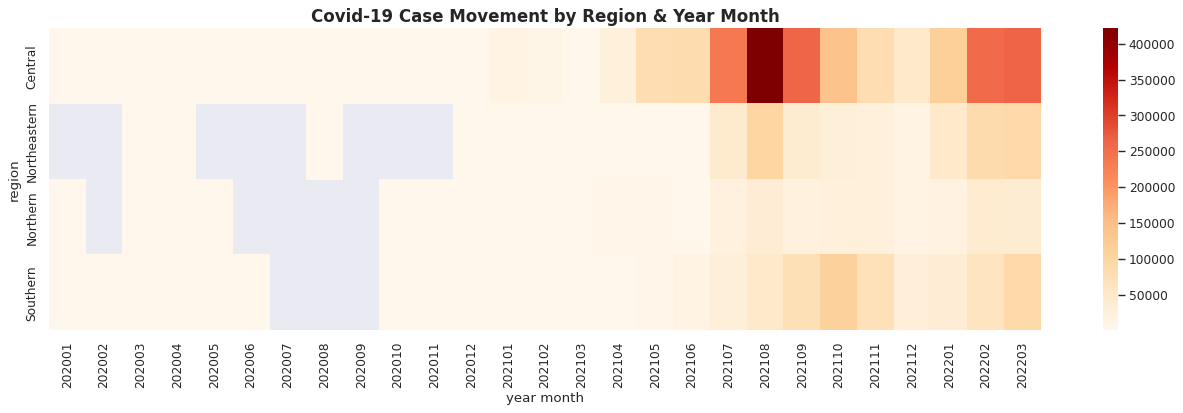

In [ ]:
yearmonth_region = all_data.groupby(['region', 'yearmonth_num'], as_index=False)['No.'].count()
yearmonth_region = yearmonth_region[yearmonth_region['region'] != "unknown"]
yearmonth_region = yearmonth_region.pivot('region', 'yearmonth_num', 'No.')
sns.heatmap(yearmonth_region,cmap='OrRd')
plt.title('Covid-19 Case Movement by Region & Year Month', fontweight='bold' , fontsize=15)
plt.xlabel('year month')
plt.show()

**<font color="IndianRed">Key Highlights:**<br>
<font color="IndianRed">
1.   จากกราฟ "Covid-19 Case Movement by Region & Year Month" พบว่าในช่วงเวลาที่มียอดผู้ติดเชื้อสูง ส่วนใหญ่เป็นผู้ติดเชื้อที่อยู่ในภาคกลาง
2.   ในช่วงปี พ.ศ.2563 ยังไม่ค่อยพบผู้ติดเชื้อในภาคตะวันออกเฉียงเหนือ, ภาคเหนือ และภาคใต้มากนัก แต่เริ่มสูงขึ้นเมื่อ เดือนกรกฎาคม พ.ศ.2464 จนถึงปัจจุบัน




### **<font color="MidnightBlue">3.2) Area-based exploration.**

Number of Covid-19 Case by Region
         region      No.  Percent
0       Central  2047483    60.62
1      Southern   585690    17.34
2  Northeastern   488526    14.46
3      Northern   255494     7.56
4       unknown      217     0.01

Number of Covid-19 Case by Gender
   sex_use      No.  Percent
0   female  1692254    50.11
1     male  1498901    44.38
2  unknown   186255     5.51

Number of Covid-19 Case by Nationality
  nationality_use      No.  Percent
0            Thai  2849111    84.36
1         unknown   298331     8.83
2         Foreign   229968     6.81

Details of Foreign
     nationality     No.  Percent
1        Burmese  133948     3.97
2      Cambodian   38728     1.15
4          Burma   18759     0.56
5  Laotian / Lao    8977     0.27
6        Russian    3599     0.11
7        Chinese    1939     0.06


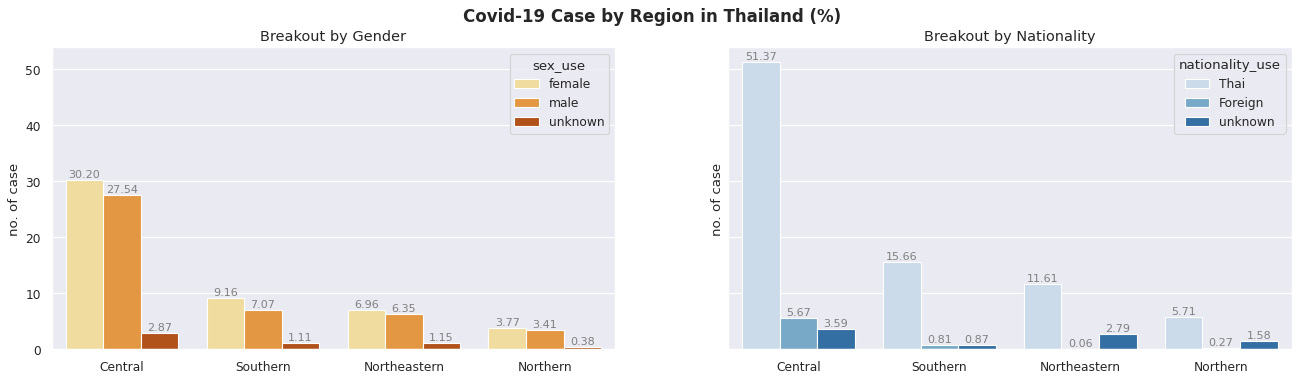

In [ ]:
region = pd.DataFrame(all_data.groupby(['region', 'sex_use'])['No.'].count()*100/all_data.shape[0]).sort_values(by = 'No.', ascending = False).reset_index()
region_ = region[region['region'] != "unknown"]

region2 = pd.DataFrame(all_data.groupby(['region', 'nationality_use'])['No.'].count()*100/all_data.shape[0]).sort_values(by = 'No.', ascending = False).reset_index()
region2_ = region2[(region2['region'] != "unknown") ]

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('Covid-19 Case by Region in Thailand (%)', fontweight='bold', fontsize=15 )

bar = sns.barplot(ax=axes[0], x='region' , y="No.", hue="sex_use", palette="YlOrBr", data=region_)
axes[0].set_title('Breakout by Gender', fontsize=13)
axes[0].set_ylabel('% of case')
axes[0].set_xlabel('')
for p in axes[0].patches:
             axes[0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                 textcoords='offset points')
          
bar2 = sns.barplot(ax=axes[1], x='region' , y="No.", hue="nationality_use", palette= 'Blues', data=region2_)
axes[1].set_title('Breakout by Nationality', fontsize=13)
axes[1].set_ylabel('% of case')
axes[1].set_xlabel('')
for p in axes[1].patches:
             axes[1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                 textcoords='offset points')

region_table = pd.DataFrame(all_data.groupby(['region'])['No.'].count()).sort_values(by = 'No.', ascending = False).reset_index()
region_table['Percent'] = round(region_table['No.']*100/all_data.shape[0],2)
print(f'Number of Covid-19 Case by Region')
print(region_table)
print()
gender_table = pd.DataFrame(all_data.groupby(['sex_use'])['No.'].count()).sort_values(by = 'No.', ascending = False).reset_index()
gender_table['Percent'] = round(gender_table['No.']*100/all_data.shape[0],2)
print(f'Number of Covid-19 Case by Gender')
print(gender_table)
print()
nation_table = pd.DataFrame(all_data.groupby(['nationality_use'])['No.'].count()).sort_values(by = 'No.', ascending = False).reset_index()
nation_table['Percent'] = round(nation_table['No.']*100/all_data.shape[0],2)
print(f'Number of Covid-19 Case by Nationality')
print(nation_table)
print()
nation_detail = pd.DataFrame(all_data.groupby(['nationality'])['No.'].count()).sort_values(by = 'No.', ascending = False).reset_index()
nation_detail['Percent'] = round(nation_detail['No.']*100/all_data.shape[0],2)
nation_detail = nation_detail[(nation_detail.nationality != 'Thai')&(nation_detail.nationality  != 'Thailand') ]
print(f'Details of Foreign')
print(nation_detail.head(6))


**<font color="IndianRed">Key Highlights:**<br>
<font color="IndianRed">
1.   จากข้อมูลผู้ติดเชื้อสะสมทั้งหมด 3,377,410 ราย เป็นผู้ติดเชื้อภาคกลางมากที่สุดคือ 60.62%, ภาคใต้ 17.34%, ภาคตะวันออกเฉียงเหนือ 14.46% และภาคเหนือน้องที่สุดคือ 7.56%
2.   จากข้อมูลผู้ติดเชื้อสะสมทั้งหมด พบว่าเป็นเพศหญิงมากกว่าเพศชายในภาพรวมถึง 5.73% (หญิง: 50.11% , ชาย: 44.38%) และจากกราฟ "Breakout by Gender" พบว่าในทุกภาคของประเทศไทยมีผู้หญิงติดเชื้อโควิดมากกว่าผู้ชายด้วย
3.   จากข้อมูลผู้ติดเชื้อสะสมทั้งหมด พบว่าเป็นผู้ติดเชื้อที่เป็นชาวต่างชาติ 6.81% และจากกราฟ "Breakout by Nationality" พบว่า ส่วนใหญ่เป็นชาวต่างชาติที่อาศัยอยู่ในภาคกลาง และรองลงมาคือภาคใต้ 
4. โดยชาวต่างชาติ 6.81% เป็นชาวเมียนมาร์ สูงสุดที่ประมาณ 4% รองลงมาคือ กัมพูชา , ลาว, รัซเซีย และจีนตามลำดับ ซึ่ง 3 ประเทศแรกเป็นประเทศเพื่อนบ้านของประเทศไทย




Text(0, 0.5, 'no. of case')

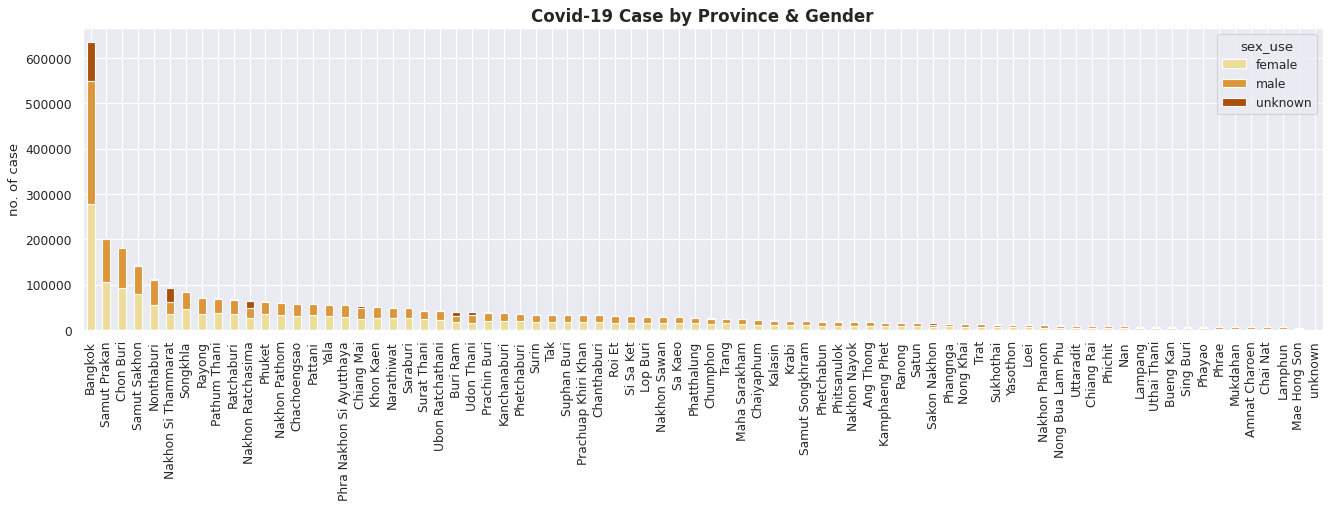

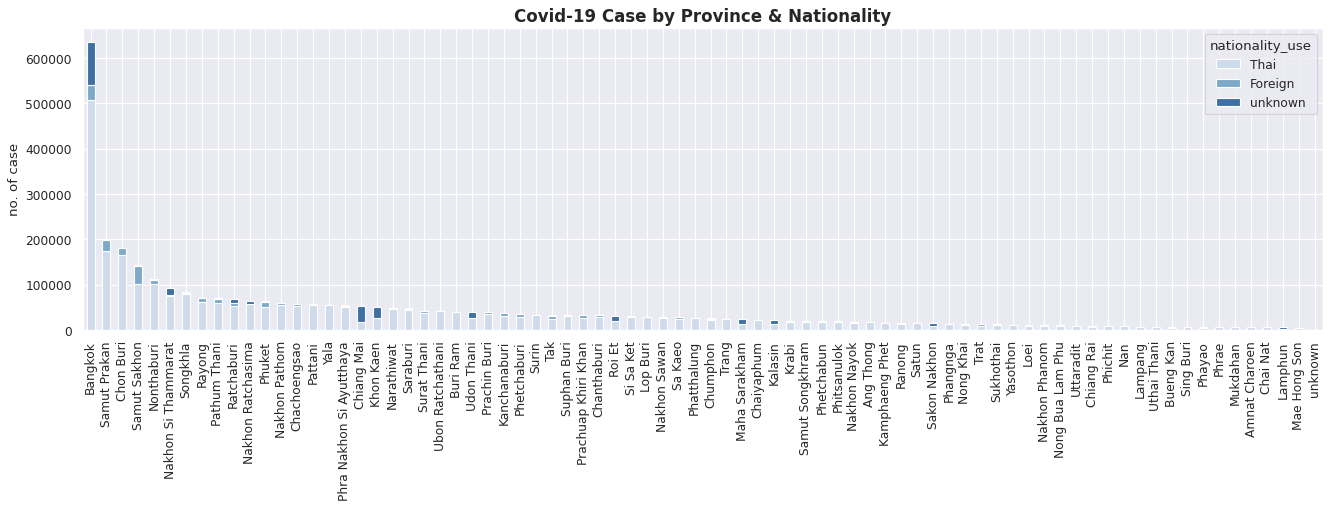

In [ ]:
prv_table_stack = pd.DataFrame(all_data.groupby(['PROVINCE_EN','sex_use'])['No.'].count()).sort_values(by = 'No.', ascending = False).reset_index()
prv_table_stack = pd.pivot_table(prv_table_stack, values='No.', index=['PROVINCE_EN'],columns=['sex_use'], aggfunc=np.sum)
prv_table_stack['total'] = prv_table_stack['female']+prv_table_stack['male']+prv_table_stack['unknown']
prv_table_stack = prv_table_stack.sort_values(by = 'total', ascending = False)
#prv_table_stack = prv_table_stack.apply(lambda x: x*100/sum(x), axis=1)

prv_table_stack[['female','male','unknown']].plot(kind='bar', stacked=True, color=['#EEDC9B', '#DD963A','#AB510F'], xlabel = '')
plt.title('Covid-19 Case by Province & Gender', fontweight='bold', fontsize=15 )
plt.ylabel("no. of case")

prv_table_stack_nation = pd.DataFrame(all_data.groupby(['PROVINCE_EN','nationality_use'])['No.'].count()).sort_values(by = 'No.', ascending = False).reset_index()
prv_table_stack_nation = pd.pivot_table(prv_table_stack_nation, values='No.', index=['PROVINCE_EN'],columns=['nationality_use'], aggfunc=np.sum)
prv_table_stack_nation['total'] = prv_table_stack_nation['Thai']+prv_table_stack_nation['Foreign']+prv_table_stack_nation['unknown']
prv_table_stack_nation = prv_table_stack_nation.sort_values(by = 'total', ascending = False)
#prv_table_stack = prv_table_stack.apply(lambda x: x*100/sum(x), axis=1)

prv_table_stack_nation[['Thai','Foreign','unknown']].plot(kind='bar', stacked=True, color=['#CDDBEB', '#7EAAC9','#3E70A4'], xlabel = '')
plt.title('Covid-19 Case by Province & Nationality', fontweight='bold', fontsize=15 )
plt.ylabel("no. of case")

**<font color="IndianRed">Key Highlights:**<br>
<font color="IndianRed">
1.   ภาพรวมในทุกจังหวัดเพศหญิงมีจำนวนมากกว่าผู้ชายเล็กน้อย
2.   ผู้ป่วยโควิดที่เป็นชาวต่างชาติที่พบในภาคกลาง พบมากในจังหวัดสมุทรสาคร, และกรุงเทพมหานคร




,PROVINCE_EN,region,No.,Percent
0,Bangkok,Central,634872,18.80
1,Samut Prakan,Central,200338,5.93
2,Chon Buri,Central,181379,5.37
3,Samut Sakhon,Central,142781,4.23
4,Nonthaburi,Central,112518,3.33
5,Nakhon Si Thammarat,Southern,93216,2.76
6,Songkhla,Southern,83206,2.46
7,Rayong,Central,69851,2.07
8,Pathum Thani,Central,69441,2.06
9,Ratchaburi,Central,67880,2.01


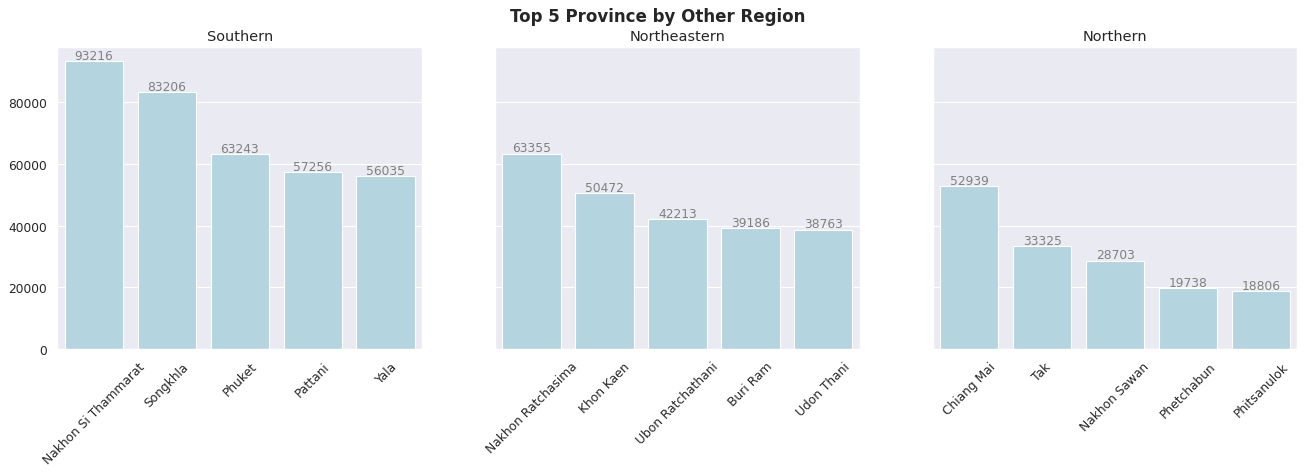

In [ ]:
prv_table = pd.DataFrame(all_data.groupby(['PROVINCE_EN','region'])['No.'].count()).sort_values(by = 'No.', ascending = False).reset_index()
prv_table['Percent'] = round(prv_table['No.']*100/all_data.shape[0],2)
prv_table_0 = prv_table[prv_table['region'] == 'Central']
prv_table_1 = prv_table[prv_table['region'] == 'Southern']
prv_table_2 = prv_table[prv_table['region'] == 'Northeastern']
prv_table_3 = prv_table[prv_table['region'] == 'Northern']
import plotly.express as px
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('Top 5 Province by Other Region', fontweight='bold', fontsize=15 )

bar = sns.barplot(ax=ax[0], x='PROVINCE_EN' , y="No.", color='lightblue', data=prv_table_1.head(5))
ax[0].set_title('Southern', fontsize=13)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].tick_params(axis='x', labelrotation=45)
for p in ax[0].patches:
             ax[0].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
          
bar2 = sns.barplot(ax=ax[1], x='PROVINCE_EN' , y="No.", color='lightblue', data=prv_table_2.head(5))
ax[1].set_title('Northeastern', fontsize=13)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].tick_params(axis='x', labelrotation=45)
for p in ax[1].patches:
             ax[1].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')

bar3 = sns.barplot(ax=ax[2], x='PROVINCE_EN' , y="No.", color='lightblue', data=prv_table_3.head(5))
ax[2].set_title('Northern', fontsize=13)
ax[2].set_ylabel('')
ax[2].set_xlabel('')
ax[2].tick_params(axis='x', labelrotation=45)
for p in ax[2].patches:
             ax[2].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
                      
prv_table.head(10)

**<font color="IndianRed">Key Highlights:**<br>
<font color="IndianRed">
1.   10 จังหวัดที่มีผู้ติดเชื้อสะสมสูงที่สุดส่วนใหญ่เป็นจังหวัดในภาคกลาง 8 จังหวัด และเป็นจังหวัดในภาคใต้ 2 จังหวัด
2.   5 จังหวัดที่มีผู้ติดเชื้อสูงสุดได้แก่ กรุงเทพมหานคร(634,872: 19%), สมุทรปราการ(200,338: 6%), ชลบุรี(181,379: 5%), สมุทรสาคร(142,781: 4%) และนนทบุรี(112,518: 3%)
3.   เนื่องจาก 5 จังหวัดที่มีผู้ติดเชื้อสูงสุดเป็นจังหวัดในภาคกลางทั้งหมด จึงมีการดูรายชื่อ 5 จังหวัดที่มีผู้ติดเชื้อสูงที่สุดในภาคอื่นๆด้วยดังกราฟ "Top 5 Province by Other Region"

### **<font color="MidnightBlue">3.3) Age-based exploration.**

In [ ]:
age_plot = all_data[(all_data['age_use'] != -999)]
age_plot_group = age_plot.groupby(['age_use','sex_use'])['No.'].count().sort_values(ascending = False).reset_index()
age_plot[['age_use']].agg(['mean', 'min', 'max','median','std'])

,age_use
mean,35.390490
min,0.000000
max,440.000000
median,34.000000
std,18.538347


In [ ]:
from scipy import stats
tmeam10 = stats.trim_mean(age_plot[['age_use']], 0.1)
tmeam20 = stats.trim_mean(age_plot[['age_use']], 0.2)
tmeam30 = stats.trim_mean(age_plot[['age_use']], 0.3)
print(f'Trim Mean 10% = {tmeam10}\nTrim Mean 20% = {tmeam20}\nTrim Mean 30% = {tmeam30}')

Trim Mean 10% = [34.75937567]
Trim Mean 20% = [34.38609667]
Trim Mean 30% = [33.96209735]


In [ ]:
age_plot_f = all_data[(all_data['age_use'] != -999)&(all_data['sex_use'] == 'female')]
age_plot_f = age_plot_f[['age_use']].agg(['mean', 'min', 'max','median','std'])
age_plot_m = all_data[(all_data['age_use'] != -999)&(all_data['sex_use'] == 'male')]
age_plot_m = age_plot_m[['age_use']].agg(['mean', 'min', 'max','median','std'])
print(f'Famale\n{age_plot_f}\n\nMale\n{age_plot_m}')

Famale
           age_use
mean     36.249338
min       0.000000
max     330.000000
median   34.000000
std      18.564286

Male
           age_use
mean     34.276996
min       0.000000
max     440.000000
median   33.000000
std      18.379735


(0.0, 100.0)

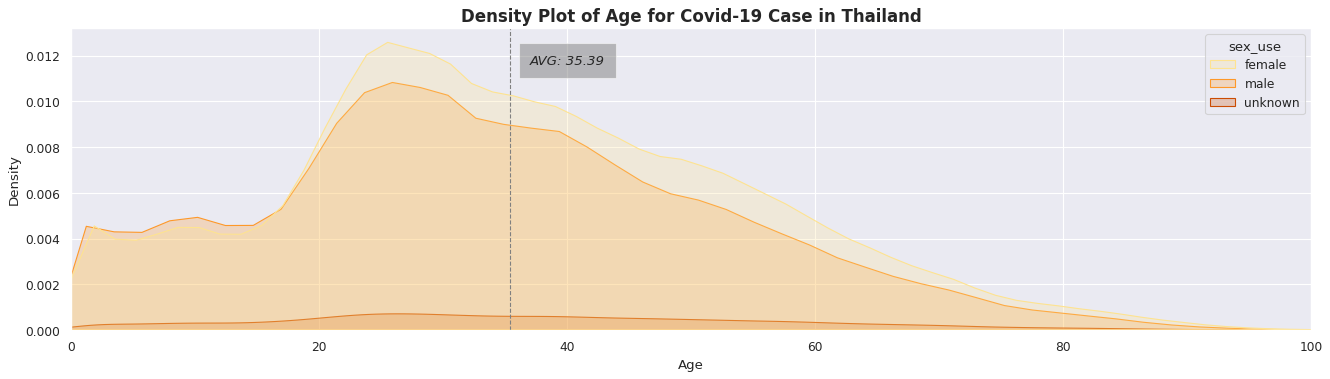

In [ ]:
#lightcoral #crest
fig, ax = plt.subplots()
sns.kdeplot(data=age_plot, x="age_use", hue="sex_use", fill=True, palette="YlOrBr")
plt.title('Density Plot of Age for Covid-19 Case in Thailand', fontweight='bold' , fontsize=15)
plt.axvline(age_plot["age_use"].mean(), color='gray', linestyle='dashed', linewidth=1)
plt.text(0.37, 0.88, f"AVG: 35.39" , transform=plt.gca().transAxes, style='italic', bbox={'facecolor': 'gray', 'alpha': 0.5, 'pad': 10})
plt.xlabel('Age')
plt.xlim(0,100,5)

**<font color="IndianRed">Key Highlights:**<br>
<font color="IndianRed">
1.   จากการคำนวณค่า trim mean ที่ 10%, 20% และ30% แล้วนั้นค่าเฉลี่ยที่ใกล้เคียงกับค่าเฉลี่ยแบบปกติที่ 35.39 ดังนั้นจึงเลือกใช้ค่าเฉลี่ยแบบปกติ เป็นค่าเฉลี่ยของอายุในการวิเคราะห์นี้
2.   ค่าเฉลี่ยของอายุรวมคือ 35 ปี 
3.   ค่าเฉลี่ยอายุของเพศชายคือ 34 ปี และค่าเฉลี่ยอายุของเพศหญิงคือ 36 ปี ค่าเฉลี่ยอายุอาเพศหญิงสูงกว่าเพศชาย 2 ปี 

### **<font color="MidnightBlue">3.4) In This Year**

In [ ]:
!pip install geopandas &> /dev/null
import geopandas as gpd
import matplotlib as mpl

Total Covid-19 Case in 2022 is 1,153,975
  yearmonth_num     No.
1        202203  485483
2        202202  451385
6        202201  217107
     province_use yearmonth_num    No.
12  กรุงเทพมหานคร        202201  28498
26         ชลบุรี        202201  18101
27    สมุทรปราการ        202201  17870
36         ภูเก็ต        202201  14341
78        นนทบุรี        202201   9603
     province_use yearmonth_num    No.
3   กรุงเทพมหานคร        202202  72346
13    สมุทรปราการ        202202  27355
18         ชลบุรี        202202  23229
24        นนทบุรี        202202  18365
28         ภูเก็ต        202202  17785
     province_use yearmonth_num    No.
4   กรุงเทพมหานคร        202203  63252
14  นครศรีธรรมราช        202203  25641
16         ชลบุรี        202203  24128
22    สมุทรปราการ        202203  19351
31      สมุทรสาคร        202203  15782


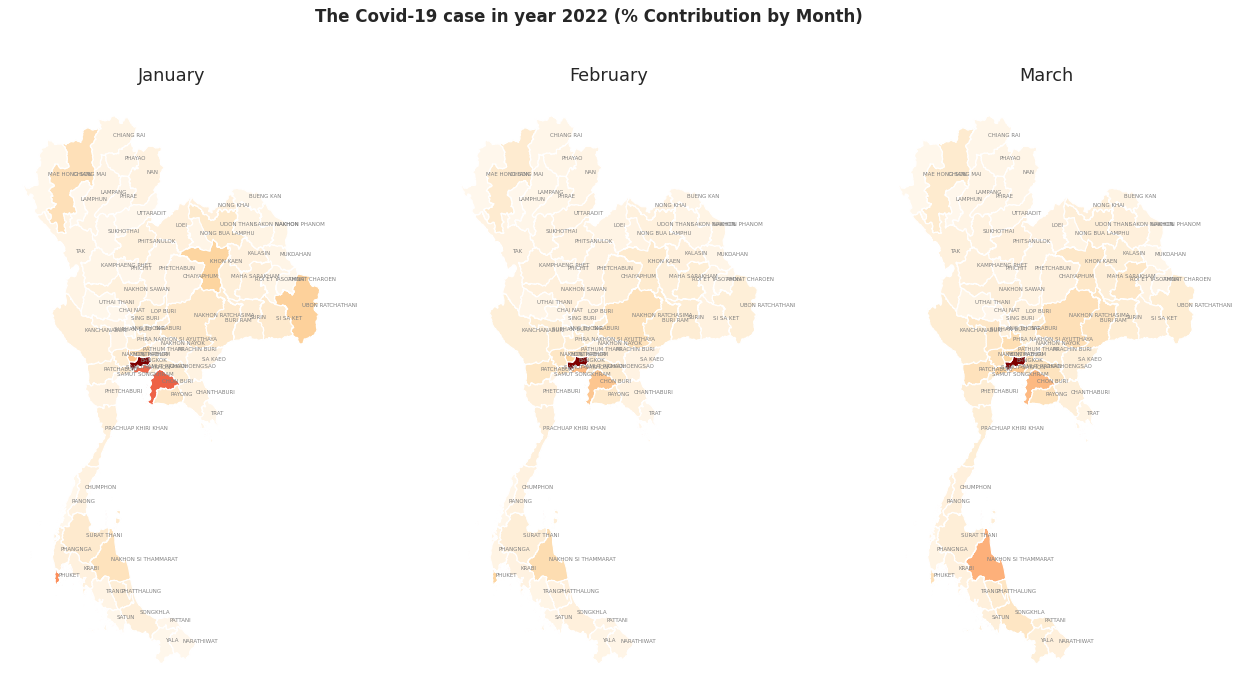

In [ ]:
path_s = '/content/drive/MyDrive/data/shape_prv/'
P_boundary = gpd.read_file(path_s+'TH_province.shp')
prv = pd.DataFrame(all_data.groupby(['province_use','yearmonth_num'])['No.'].count()).sort_values(by = 'No.', ascending = False).reset_index()
prv_0 = prv[(prv['province_use'] != "unknown") & (prv['yearmonth_num'] == '202201')]
prv_1 = prv[(prv['province_use'] != "unknown") & (prv['yearmonth_num'] == '202202')]
prv_2 = prv[(prv['province_use'] != "unknown") & (prv['yearmonth_num'] == '202203')]

fig, ax = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
fig.suptitle('The Covid-19 case in year 2022 (% Contribution by Month)', fontweight='bold', fontsize=15 )
th_boundary_vol = P_boundary.merge(prv_0, left_on='p_name_t', right_on = 'province_use').sort_values(by = 'No.', ascending = False)
#th_boundary_vol_label = th_boundary_vol.head(10)
th_boundary_vol.plot(ax=ax[0],cmap='OrRd', column = 'No.')
ax[0].set_title('January', fontsize=16)
for x, y, label1 in zip(th_boundary_vol.geometry.centroid.x, th_boundary_vol.geometry.centroid.y, th_boundary_vol.p_name_e):
    ax[0].annotate(label1, xy=(x, y), xytext=(1, 1), textcoords="offset pixels" ,color = 'gray', fontsize=5)
ax[0].axis('off')

th_boundary_vol = P_boundary.merge(prv_1, left_on='p_name_t', right_on = 'province_use').sort_values(by = 'No.', ascending = False)
#th_boundary_vol_label = th_boundary_vol.head(10)
th_boundary_vol.plot(ax=ax[1],cmap='OrRd', column = 'No.')
ax[1].set_title('February', fontsize=16)
for x, y, label1 in zip(th_boundary_vol.geometry.centroid.x, th_boundary_vol.geometry.centroid.y, th_boundary_vol.p_name_e):
    ax[1].annotate(label1, xy=(x, y), xytext=(1, 1), textcoords="offset pixels" ,color = 'gray', fontsize=5)
ax[1].axis('off')

th_boundary_vol = P_boundary.merge(prv_2, left_on='p_name_t', right_on = 'province_use').sort_values(by = 'No.', ascending = False)
#th_boundary_vol_label = th_boundary_vol.head(10)
th_boundary_vol.plot(ax=ax[2],cmap='OrRd', column = 'No.')
ax[2].set_title('March', fontsize=16)
for x, y, label1 in zip(th_boundary_vol.geometry.centroid.x, th_boundary_vol.geometry.centroid.y, th_boundary_vol.p_name_e):
    ax[2].annotate(label1, xy=(x, y), xytext=(1, 1), textcoords="offset pixels" ,color = 'gray', fontsize=5)
ax[2].axis('off')

fig.show()

y2022 = pd.DataFrame(all_data.groupby(['yearmonth_num'])['No.'].count()).sort_values(by = 'No.', ascending = False).reset_index()
filter_list = ['202201', '202202', '202203']
y2022 = y2022[y2022.yearmonth_num.isin(filter_list)]
total = y2022['No.'].sum()
print(f'Total Covid-19 Case in 2022 is {total:,}\n{y2022}')
print(prv_0.head())
print(prv_1.head())
print(prv_2.head())



**<font color="IndianRed">Key Highlights:**<br>
<font color="IndianRed">
1.   ในปี2022 มีผู้ป่วยโควิดสะสมถึง 1,153,975 ราย ภายในระยะเวลา 3 เดือนแรกของปี และเพิ่มต่อเนื่องขึ้นเรื่อยๆจากเดือนมกราคม จนถึงมีนาคม
2.   ในทั้ง 3 เดือนแรก มีผู้ป่วยสะสมสูงโดยเฉพาะกรุงเทพมหานคร และปริมณฑล
3.   ในเดือนมกราคม นอกจากจะมียอดผู้ป่วยสูงในโซนกรุงเทพมหานคร และปริมณฑลแล้ว ยังพบผู้ป่วยสูงในจ.ชลบุรี, ภูเก็ต, อุบลราชธานี, ขอนแก่น และแม่ฮ่องสอน ตามลำดับความเข้มของสี
4.   ในเดือนกุมภาพันธ์ นอกจากจะมียอดผู้ป่วยสูงในโซนกรุงเทพมหานคร และปริมณฑลแล้ว ยังพบผู้ป่วยสูงในจ.ชลบุรี, ภูเก็ต, นครราชสีมา และนครศรีธรรมราช ตามลำดับความเข้มของสี
5.   ในเดือนมีนาคาม นอกจากจะมียอดผู้ป่วยสูงในโซนกรุงเทพมหานคร และปริมณฑลแล้ว ยังพบผู้ป่วยสูงในจ.นครศรีธรรมราช, ชลบุรี, สมุทรสาคร และนครราชสีมา